In [9]:
import torch
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import json
import os

In [10]:
# 基本路径
IMAGE_PATH = 'data'
TRAIN_IMAGE_PATH = os.path.join(IMAGE_PATH, 'trainset/train')
VAL_IMAGE_PATH = os.path.join(IMAGE_PATH, 'valset/val')
TEXT_IMAGE_PATH = os.path.join(IMAGE_PATH, 'testset/val')

In [11]:
# 加载训练集、验证集数据
with open('data/trainset/train.json', 'r') as f:
    train_json = json.load(f)

with open('data/valset/val.json', 'r') as f:
    val_json = json.load(f)

train_image = pd.DataFrame(train_json['images'])
val_image = pd.DataFrame(val_json['images'])

val_image.head()

,file_name,height,width,id
0,1d8c2893-5173-47ad-8767-96bd19341252.jpg,2526,1786,6
1,d09415c0-58c8-4fb7-bc20-28d0ca5f4bc7.jpg,2526,1786,2058
2,ff1c86e2-4941-4c8c-bb04-baa5b224dfc0.jpg,2526,1786,12
3,e46f0e53-cab1-448e-9dd5-b244cda7dc9b.jpg,2424,1786,14
4,743eed8d-31af-4279-8d7f-867456123410.jpg,2526,1786,2064


In [12]:
# 加载所有数据集（trainval）
with open('data/trainvalset/train.json', 'r') as f:
    data = json.load(f)

data_images = pd.DataFrame(data['images'])
data_images

,file_name,height,width,id
0,4db3decf-e07d-4477-a4be-fe5c2be1627c.jpg,2333,1803,0
1,3ff0a0fb-cab9-4473-9d30-bb3f60abfd6d.jpg,2424,1786,1
2,d3405f5c-c630-418c-b6dd-4da238b94b14.jpg,2424,1786,2
3,78316103-9a29-4824-b462-3b0245fb872d.jpg,2526,1786,3
4,e24cc889-13c0-4166-89e9-37bf54c3a764.jpg,2526,1786,4
...,...,...,...,...
3253,03bae86e-0e47-450e-95a7-5bfbe7164b19.jpg,2424,1786,3253
3254,7c1b9998-8805-4417-9b6d-606c641c1625.jpg,2526,1786,3254
3255,38e67bce-6472-4b28-81c9-c9ad21b397de.jpg,2424,1786,3255
3256,45e429e9-02fb-4e1d-ac7f-f8b6cc3194ad.jpg,2424,1786,3256


In [13]:
# 合并整体标注
data_anno = pd.DataFrame(data['annotations'])
df_data = pd.merge(left=data_images, right=data_anno, how='inner', left_on='id', right_on='image_id')
df_data['bbox_xmin'] = df_data['bbox'].apply(lambda x: x[0])
df_data['bbox_ymin'] = df_data['bbox'].apply(lambda x: x[1])
df_data['bbox_w'] = df_data['bbox'].apply(lambda x: x[2])
df_data['bbox_h'] = df_data['bbox'].apply(lambda x: x[3])
df_data

,file_name,height,width,id_x,segmentation,area,iscrowd,image_id,bbox,category_id,id_y,bbox_xmin,bbox_ymin,bbox_w,bbox_h
0,4db3decf-e07d-4477-a4be-fe5c2be1627c.jpg,2333,1803,0,"[[126.0, 94.0, 465.0, 94.0, 465.0, 238.0, 126....",48816.0,0,0,"[126.0, 94.0, 339.0, 144.0]",4,0,126.0,94.0,339.0,144.0
1,4db3decf-e07d-4477-a4be-fe5c2be1627c.jpg,2333,1803,0,"[[127.0, 321.0, 716.0, 321.0, 716.0, 352.0, 12...",18259.0,0,0,"[127.0, 321.0, 589.0, 31.0]",7,1,127.0,321.0,589.0,31.0
2,4db3decf-e07d-4477-a4be-fe5c2be1627c.jpg,2333,1803,0,"[[1148.0, 127.0, 1456.0, 127.0, 1456.0, 159.0,...",9856.0,0,0,"[1148.0, 127.0, 308.0, 32.0]",2,2,1148.0,127.0,308.0,32.0
3,4db3decf-e07d-4477-a4be-fe5c2be1627c.jpg,2333,1803,0,"[[1492.0, 149.0, 1605.0, 149.0, 1605.0, 228.0,...",8927.0,0,0,"[1492.0, 149.0, 113.0, 79.0]",2,3,1492.0,149.0,113.0,79.0
4,4db3decf-e07d-4477-a4be-fe5c2be1627c.jpg,2333,1803,0,"[[777.0, 190.0, 1456.0, 190.0, 1456.0, 221.0, ...",21049.0,0,0,"[777.0, 190.0, 679.0, 31.0]",2,4,777.0,190.0,679.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48813,31049110-80fc-4ac6-80e0-3b4ed0893eb3.jpg,2424,1786,3257,"[[272.0, 526.0, 987.0, 526.0, 987.0, 761.0, 27...",168025.0,0,3257,"[272.0, 526.0, 715.0, 235.0]",0,48813,272.0,526.0,715.0,235.0
48814,31049110-80fc-4ac6-80e0-3b4ed0893eb3.jpg,2424,1786,3257,"[[1015.0, 430.0, 1434.0, 430.0, 1434.0, 467.0,...",15503.0,0,3257,"[1015.0, 430.0, 419.0, 37.0]",1,48814,1015.0,430.0,419.0,37.0
48815,31049110-80fc-4ac6-80e0-3b4ed0893eb3.jpg,2424,1786,3257,"[[210.0, 428.0, 984.0, 428.0, 984.0, 511.0, 21...",64242.0,0,3257,"[210.0, 428.0, 774.0, 83.0]",1,48815,210.0,428.0,774.0,83.0
48816,31049110-80fc-4ac6-80e0-3b4ed0893eb3.jpg,2424,1786,3257,"[[207.0, 224.0, 469.0, 224.0, 469.0, 272.0, 20...",12576.0,0,3257,"[207.0, 224.0, 262.0, 48.0]",2,48816,207.0,224.0,262.0,48.0


标签类别: [{'id': 0, 'name': 'Text'}, {'id': 1, 'name': 'Title'}, {'id': 2, 'name': 'Header'}, {'id': 3, 'name': 'Footer'}, {'id': 4, 'name': 'Figure'}, {'id': 5, 'name': 'Table'}, {'id': 6, 'name': 'Toc'}, {'id': 7, 'name': 'Figure caption'}, {'id': 8, 'name': 'Table caption'}, {'id': 9, 'name': 'Equation'}, {'id': 10, 'name': 'Footnote'}]
类别数量： 11
训练集图片数量： 3258
训练集标签数量： 48818
长宽为(1313,2334)的图片数量为： 12
长宽为(2382,1786)的图片数量为： 137
长宽为(2126,1659)的图片数量为： 1
长宽为(2334,1721)的图片数量为： 33
长宽为(2335,1720)的图片数量为： 45
长宽为(2526,1787)的图片数量为： 3
长宽为(2338,1654)的图片数量为： 1
长宽为(2376,1836)的图片数量为： 23
长宽为(2526,1701)的图片数量为： 1
长宽为(2328,1646)的图片数量为： 125
长宽为(2334,1720)的图片数量为： 4
长宽为(2526,1786)的图片数量为： 1587
长宽为(2527,1785)的图片数量为： 3
长宽为(2333,1803)的图片数量为： 54
长宽为(2328,1645)的图片数量为： 23
长宽为(1748,2330)的图片数量为： 4
长宽为(2382,1744)的图片数量为： 17
长宽为(2327,1646)的图片数量为： 517
长宽为(2424,1786)的图片数量为： 653
长宽为(2339,1654)的图片数量为： 15
训练集图片数量: 3258
unique id 数量： 48818
unique image_id 数量 3258
category: {0: 'Text', 1: 'Title', 2: 'Header', 3: 'Footer', 4: 'Fi

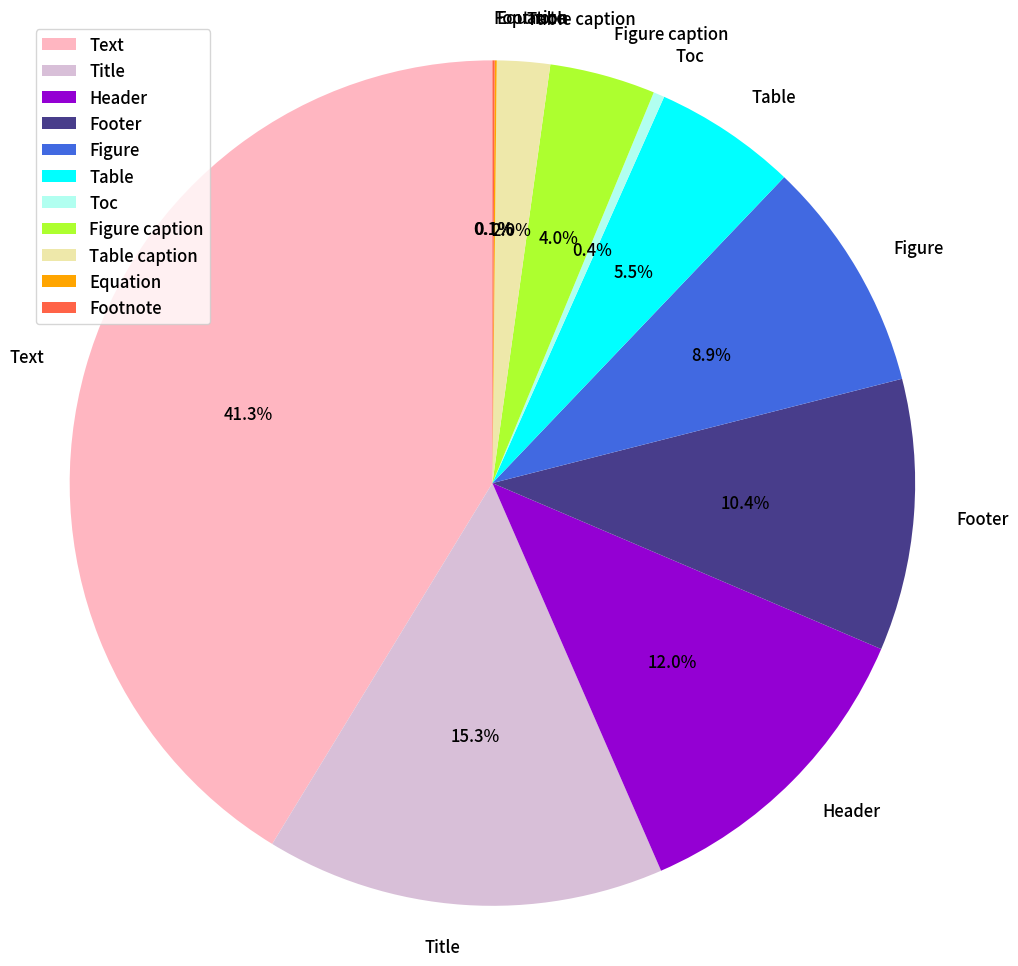

In [19]:
# 数据集基本信息分析
from matplotlib.font_manager import FontProperties
myfont = FontProperties(fname=r"NotoSansCJKsc-Medium.otf", size=12)
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.family']= myfont.get_family()
plt.rcParams['font.sans-serif'] = myfont.get_name()
plt.rcParams['axes.unicode_minus'] = False

def generate_anno_eda(anno):

    print('标签类别:', anno['categories'])
    print('类别数量：', len(anno['categories']))
    print('训练集图片数量：', len(anno['images']))
    print('训练集标签数量：', len(anno['annotations']))

    total=[]
    for img in anno['images']:
        hw = (img['height'],img['width'])
        total.append(hw)
    unique = set(total)
    for k in unique:
        print('长宽为(%d,%d)的图片数量为：'%k,total.count(k))

    ids=[]
    images_id=[]
    for i in anno['annotations']:
        ids.append(i['id'])
        images_id.append(i['image_id'])
    print('训练集图片数量:', len(anno['images']))
    print('unique id 数量：', len(set(ids)))
    print('unique image_id 数量', len(set(images_id)))

    # 创建类别标签字典
    category_dic=dict([(i['id'],i['name']) for i in anno['categories']])
    counts_label=dict([(i['name'],0) for i in anno['categories']])
    for i in anno['annotations']:
        counts_label[category_dic[i['category_id']]] += 1
    print("category: {}".format(category_dic))
    print("counts_label: {}".format(counts_label))
    label_list = counts_label.keys()    # 各部分标签
    print('标签列表:', label_list)
    size = counts_label.values()    # 各部分大小
    print('标签分布:', size)

    color = ['#FFB6C1', '#D8BFD8', '#9400D3', '#483D8B', '#4169E1', '#00FFFF','#B1FFF0','#ADFF2F','#EEE8AA','#FFA500','#FF6347']     # 各部分颜色
    # explode = [0.05, 0, 0]   # 各部分突出值
    patches, l_text, p_text = plt.pie(size, labels=label_list, colors=color, labeldistance=1.1, autopct="%1.1f%%", shadow=False, startangle=90, pctdistance=0.6, textprops={'fontproperties':myfont})
    plt.axis("equal")    # 设置横轴和纵轴大小相等，这样饼才是圆的
    plt.legend(prop=myfont)
    plt.show()

generate_anno_eda(data)

In [ ]:
def get_all_bboxes(df: pd.DataFrame, name):
    image_bboxes = df[df.file_name == name]

    bboxes = []
    categories = []
    for _, row in image_bboxes.iterrows():
        bboxes.append((row.bbox_xmin, row.bbox_ymin, row.bbox_w, row.bbox_h, row.category_id))
    
    return bboxes

def plot_image_examples(df: pd.DataFrame, )
